# IMPORTAZIONE

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from shutil import copyfile
copyfile("gdrive/MyDrive/Progetto_SDATSA/y_train.csv", "y_train.csv")
copyfile("gdrive/MyDrive/Progetto_SDATSA/y_test.csv", "y_test.csv")

'y_test.csv'

In [ ]:
import pandas as pd

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mape
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
from keras.layers import GRU

In [ ]:
df_train = pd.read_csv('y_train.csv')
df_test = pd.read_csv('y_test.csv')
df = df_train.append(df_test, ignore_index=True)

# Funzioni utili

In [ ]:
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
def predict(num_prediction, model):
    prediction_list = dataset[-look_back:]
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, 1, look_back))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back:]
    return prediction_list

# Long Short-Term Memory (LSTM)

In [ ]:
dataframe = df.values.astype('float32')

In [ ]:
#NORMALIZZAZIONE
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataframe)

#CREAZIONE TRAIN E TEST SET
train, test = dataset[0:len(df_train),:], dataset[len(df_train):len(dataset),:]

In [ ]:
train.shape

(6820, 1)

In [ ]:
test.shape

(1706, 1)

In [ ]:
#IPERPARAMETRO PERIODI PRECEDENTI ALLA PREDIZIONE CONSIDERATI 
look_back = 168  

In [ ]:
trainX, trainY = create_dataset(train, look_back)

In [ ]:
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(6651, 168)

In [ ]:
#CONVERSIONE DEI DATI IN FORMATO RICHIESTO DALLA RETE
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
#CREAZIONE DELLA RETE
early_stop = EarlyStopping(monitor = 'loss', patience = 5)

model = Sequential()
model.add(LSTM(256, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#FIT DELLA RETE
model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=1, callbacks = [early_stop], shuffle=False)

Epoch 1/100
416/416 [==============================] - 8s 4ms/step - loss: 0.0156
Epoch 2/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0143
Epoch 3/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0139
Epoch 4/100
416/416 [==============================] - 2s 4ms/step - loss: 0.0098
Epoch 5/100
416/416 [==============================] - 2s 4ms/step - loss: 0.0087
Epoch 6/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0081
Epoch 7/100
416/416 [==============================] - 2s 4ms/step - loss: 0.0077
Epoch 8/100
416/416 [==============================] - 2s 4ms/step - loss: 0.0074
Epoch 9/100
416/416 [==============================] - 2s 4ms/step - loss: 0.0071
Epoch 10/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0068
Epoch 11/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0065
Epoch 12/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0063
Epoch 13/100


In [ ]:
#PREDIZIONI
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# PERFORMANCE DEL MODELLO
trainScore = mape(trainY[0], trainPredict[:,0])
print('MAPE Train: %.4f' % (trainScore*100))
testScore = mape(testY[0], testPredict[:,0])
print('MAPE Test: %.4f' % (testScore*100))

MAPE Train: 5.8161
MAPE Test: 7.8333


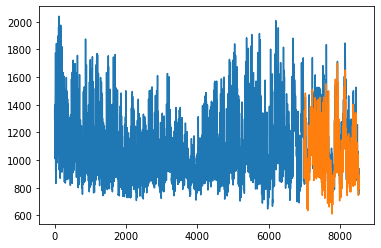

In [ ]:
# GRAFICO DELLE PREVISIONI
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset)-2, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.show()

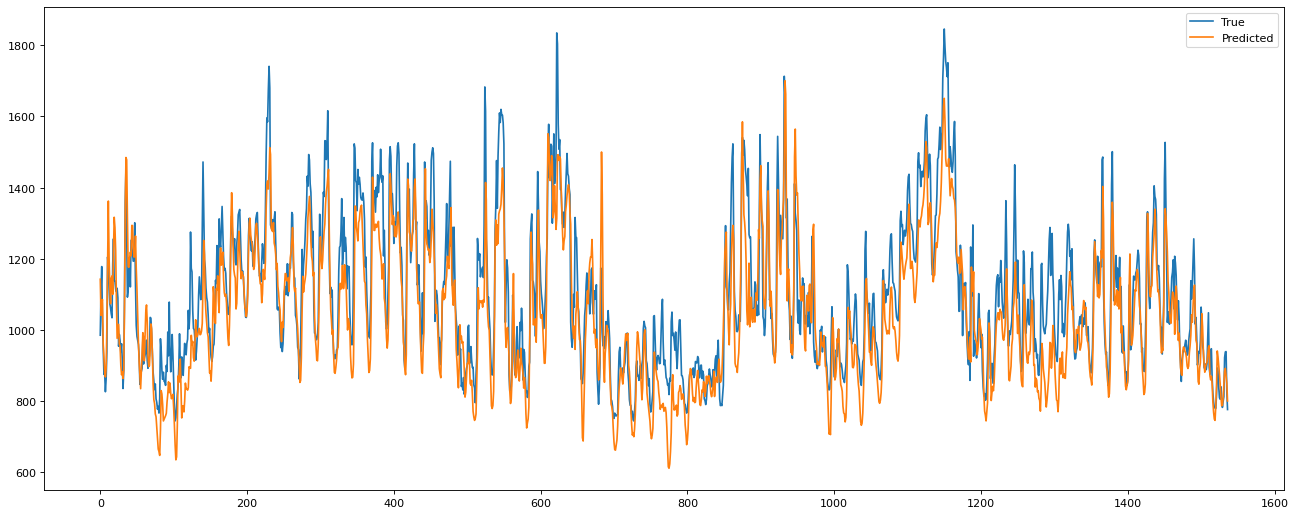

In [ ]:
figure(figsize=(20, 8), dpi=80)
plt.plot(testY[0], label='True')
plt.plot(testPredict[:,0], label='Predicted')
plt.legend(loc="upper right")
plt.show()

# GRU

In [ ]:
look_back = 168

In [ ]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
early_stop = EarlyStopping(monitor = 'loss', patience = 5)

model= Sequential()
model.add(GRU(256, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=1, callbacks = [early_stop])

Epoch 1/100
416/416 [==============================] - 3s 4ms/step - loss: 0.0100
Epoch 2/100
416/416 [==============================] - 1s 4ms/step - loss: 0.0047
Epoch 3/100
416/416 [==============================] - 1s 4ms/step - loss: 0.0045
Epoch 4/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0041
Epoch 5/100
416/416 [==============================] - 3s 6ms/step - loss: 0.0038
Epoch 6/100
416/416 [==============================] - 2s 4ms/step - loss: 0.0039
Epoch 7/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0038
Epoch 8/100
416/416 [==============================] - 2s 4ms/step - loss: 0.0035
Epoch 9/100
416/416 [==============================] - 2s 4ms/step - loss: 0.0034
Epoch 10/100
416/416 [==============================] - 2s 4ms/step - loss: 0.0035
Epoch 11/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0036
Epoch 12/100
416/416 [==============================] - 2s 5ms/step - loss: 0.0031
Epoch 13/100


In [ ]:
#Previsioni
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = mape(trainY[0], trainPredict[:,0])
print('Train MAPE: %.4f' % (trainScore*100))
testScore = mape(testY[0], testPredict[:,0]) 
print('Test MAPE: %.4f' % (testScore*100))

Train MAPE: 4.6053
Test MAPE: 4.6975


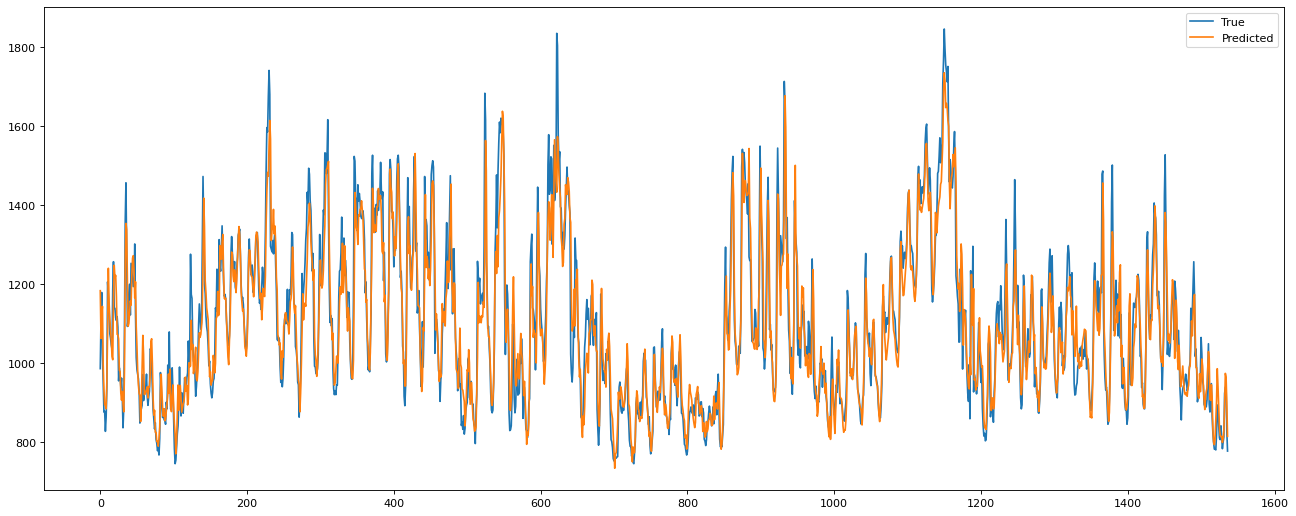

In [ ]:
figure(figsize=(20, 8), dpi=80)
plt.plot(testY[0], label='True')
plt.plot(testPredict[:,0], label='Predicted')
plt.legend(loc="upper right")
plt.show()

## PREVISIONI MARZO

In [ ]:
look_back = 168
dataX, dataY = create_dataset(dataset, look_back)

In [ ]:
dataX = np.reshape(dataX, (dataX.shape[0], 1, dataX.shape[1]))

In [ ]:
early_stop = EarlyStopping(monitor = 'loss', patience = 5)

model= Sequential()
model.add(GRU(256, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(dataX, dataY, epochs=100, batch_size=16, verbose=1, callbacks = [early_stop])

Epoch 1/100
523/523 [==============================] - 3s 4ms/step - loss: 0.0087
Epoch 2/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0044
Epoch 3/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0041
Epoch 4/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0038
Epoch 5/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0036
Epoch 6/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0037
Epoch 7/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0037
Epoch 8/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0034
Epoch 9/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0032
Epoch 10/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0032
Epoch 11/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0032
Epoch 12/100
523/523 [==============================] - 2s 3ms/step - loss: 0.0032
Epoch 13/100


In [ ]:
predictions = predict(744, model)

predictions = scaler.inverse_transform(predictions.reshape(-1,1)).flatten()

In [ ]:
dates_dataset = pd.date_range(start='2004-03-10 18:00:00', end='2005-02-28 23:00:00', freq='h')

In [ ]:
dates_march = pd.date_range(start='2005-03-01 00:00:00', end='2005-03-31 23:00:00', freq='h')

In [ ]:
dates_march

DatetimeIndex(['2005-03-01 00:00:00', '2005-03-01 01:00:00',
               '2005-03-01 02:00:00', '2005-03-01 03:00:00',
               '2005-03-01 04:00:00', '2005-03-01 05:00:00',
               '2005-03-01 06:00:00', '2005-03-01 07:00:00',
               '2005-03-01 08:00:00', '2005-03-01 09:00:00',
               ...
               '2005-03-31 14:00:00', '2005-03-31 15:00:00',
               '2005-03-31 16:00:00', '2005-03-31 17:00:00',
               '2005-03-31 18:00:00', '2005-03-31 19:00:00',
               '2005-03-31 20:00:00', '2005-03-31 21:00:00',
               '2005-03-31 22:00:00', '2005-03-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')

In [ ]:
dataset = df.reset_index()
ts = pd.DataFrame(dataset['V1'])
ts['date'] = dates_dataset
ts = ts.set_index('date')


forecast_df = pd.DataFrame()
forecast_df.index = dates_march
forecast_df['CO'] = predictions

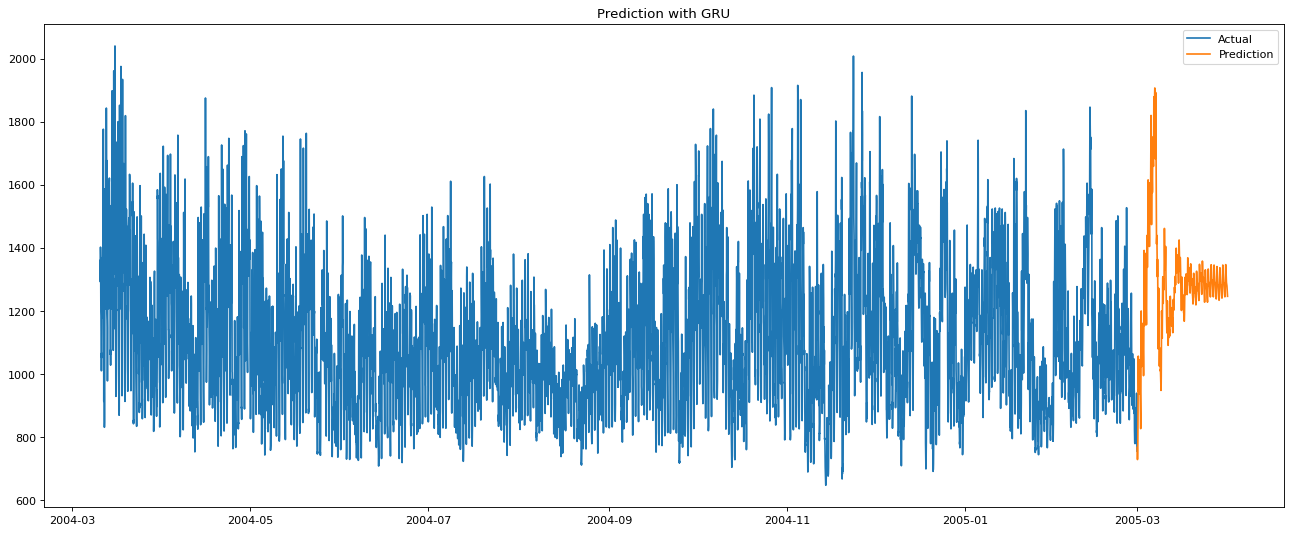

In [ ]:
fig=plt.figure(figsize=(20,8), dpi=80)
fig.show()
ax=fig.add_subplot()
plt.title('Prediction with GRU')
ax.plot(ts, label='Actual')
ax.plot(forecast_df['CO'], label='Prediction')
plt.legend()
plt.show()

In [ ]:
forecast_df.to_csv("prev_ml.csv")

In [ ]:
model.save('ml.h5')